# Challenge 4: Nested dictionaries

Next week we will deal with web scraping and API's. Python wise this means since we will encounter file formats like JSON we will have to deal with a lot of dictionaries. Not only ordinary dictionaries, but also nested ones. In this lab we will train handling them.

In the following, if we show values with markdown, just copy-paste them into your `# my code here` field if you need them.

**Warm up phase: Here are some keys and values. Use them to build a dictionary called `numbers_dct`**

```python
keys = ['hundred', 'twohundred', 'threehundred']
values = [10, 20, 30]
```

In [1]:
keys = ['hundred', 'twohundred', 'threehundred']
values = [10, 20, 30]


Lists of keys and values can be used to make a dictionary using the zip function and then casting the result.

In [3]:
numbers_dct=dict(zip(keys,values))

**Here are two dictionaries. Merge their entries to a third dictionary**

```python
dict1 = {'One': 1, 'Two': 2, 'Six': 6}
dict2 = {'Thirty': 30, 'Fourty': 40, 'Fifty': 50}
```

Python dictionaries can be merged with the | operator

In [4]:
dict1 = {'One': 1, 'Two': 2, 'Six': 6}
dict2 = {'Thirty': 30, 'Fourty': 40, 'Fifty': 50}

In [8]:
dict3 = dict1|dict2
dict3

{'One': 1, 'Two': 2, 'Six': 6, 'Thirty': 30, 'Fourty': 40, 'Fifty': 50}

**Nested dictionaries**

Here comes a bigger, nested dictionary. Store Martin's French grades in a variable called `martins_french` by navigating to the value using keys and values. Remember, while you drill down the structure of the dictionary and you encounter a new dictionary, you can always use `.keys()` and `.values()` to not loose orientation.

In [9]:
sampleDict = {
    "class":{
        "student_list":{
            "Anna":{
                "marks":{
                    "physics":[70, 20, 100, 20],
                    "history":[80,10,55,35],
                    "math":[100, 90, 70, 35],
                }
            },
            "Martin":{
                "marks":{
                    "french":[20, 10, 35, 45],
                    "spanish":[40, 75, 50, 90],
                    "math": [90,85, 90, 95],
                }
            },
            "Richard":{
                "marks":{
                    "physics":[10, 10, 0, 90],
                    "biology":[50, 50, 70, 75],
                    "math":[90, 70, 50, 40],
                }
            }
        }
    }
}

In [11]:
martins_french = sampleDict["class"]["student_list"]["Martin"]["marks"]["french"]
martins_french

[20, 10, 35, 45]

**Calculate the mean of Richard's biology's grades**

In [48]:
richard_biology = sampleDict["class"]["student_list"]["Richard"]["marks"]["biology"]
rb_avg = sum(richard_biology)/len(richard_biology)
rb_avg


61.25

**Return a list of all the students**

In [20]:
studs = sampleDict["class"]["student_list"].keys()
studs = list(studs)
studs

['Anna', 'Martin', 'Richard']

**Return Anna's 2nd grade in history**

In [22]:
Annas2nd_hist = sampleDict["class"]["student_list"]["Anna"]["marks"]["history"][1]
Annas2nd_hist


10

**Return all the grades that are 3rd in the list for every subject for all the students**

Use appropriate `for` loops and a `print()` statement

In [ ]:


for name in sampleDict["class"]["student_list"].values():
    for topic in name.values():
        for grades in topic.values():
            print(grades[2])

**Get all the grades and store them in a list `all_grades` Calculate the mean (solution: 55.97)**

You can of course use a modified version of your solution of the previous question.

In [32]:
all_grades = []


In [34]:
for name in sampleDict["class"]["student_list"].values():
    for topic in name.values():
        for grades in topic.values():
            for g in grades:
                all_grades.append(g)
            

In [35]:
all_grades

[70,
 20,
 100,
 20,
 80,
 10,
 55,
 35,
 100,
 90,
 70,
 35,
 20,
 10,
 35,
 45,
 40,
 75,
 50,
 90,
 90,
 85,
 90,
 95,
 10,
 10,
 0,
 90,
 50,
 50,
 70,
 75,
 90,
 70,
 50,
 40]

In [40]:
mean_grade = sum(all_grades)/len(all_grades)
print("The mean of all the grades is", mean_grade)

The mean of all the grades is 55.97222222222222


**Save that list as a column in a pandas dataframe and plot a histogram with it**

In [41]:
import pandas as pd


In [42]:
grades_df = pd.DataFrame (all_grades, columns = ['grades'])
grades_df


,grades
0,70
1,20
2,100
3,20
4,80
5,10
6,55
7,35
8,100
9,90


In [ ]:
To make a histogram we use the data frame hist method 

Output should look like this

array([[<AxesSubplot:title={'center':'grades'}>]], dtype=object)

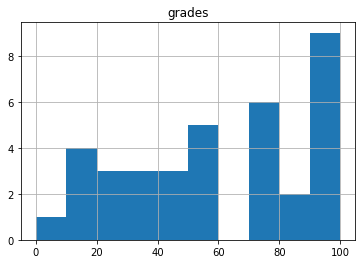

In [44]:
grades_df.hist(column='grades')

**Return all the students subjects. Watch out: We don't want repetitions!**

In [60]:
names = [ x for x in list(sampleDict["class"]["student_list"].keys())]

In [73]:
temp = [list(sampleDict["class"]["student_list"][name]["marks"].keys()) for name in names]

In [78]:
tempf = [i for row in temp for i in row]
tempf = set(tempf)
tempf

{'biology', 'french', 'history', 'math', 'physics', 'spanish'}

Brute force 

In [80]:
subjects=set(sampleDict["class"]["student_list"]["Martin"]["marks"].keys()).union(set(sampleDict["class"]["student_list"]["Anna"]["marks"].keys())).union(set(sampleDict["class"]["student_list"]["Richard"]["marks"].keys()))
subjects

{'biology', 'french', 'history', 'math', 'physics', 'spanish'}

Output should look like this

**Richard heard you're a data enthusiast and asks you to hack the school server and and replace his worst physics grade rounded to full integers (0) with the mean of his physics grades (he doesn't want to raise suspicion). Help him do that. Check wether your hack was successful by printing his physics grade**

In [85]:
richard_physics = sampleDict["class"]["student_list"]["Richard"]["marks"]["physics"]
richard_physics


[10, 10, 0, 90]

In [83]:
richard_mean = sum(richard_physics)/len(richard_physics)

In [84]:
richard_mean

27.5

Hack the grade by changing the list

In [89]:
sampleDict["class"]["student_list"]["Richard"]["marks"]["physics"][2]=richard_mean

In [90]:
richard_physics

[10, 10, 27.5, 90]

**The hack was discovered! They found out it must have been Richard because his physics grade is not a multiple of 5 like all the other grades**

Expell Richard (poor Richard!) by removing him from the dictionary. Use `del`. And print the resulting class dictionary.

In [92]:
del sampleDict["class"]["student_list"]["Richard"]

In [94]:
print(sampleDict)

{'class': {'student_list': {'Anna': {'marks': {'physics': [70, 20, 100, 20], 'history': [80, 10, 55, 35], 'math': [100, 90, 70, 35]}}, 'Martin': {'marks': {'french': [20, 10, 35, 45], 'spanish': [40, 75, 50, 90], 'math': [90, 85, 90, 95]}}}}}
